In [5]:
import geopandas
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline



In [6]:
track_line_gdf=geopandas.read_file('al052019-037_5day_lin.shp')
cone_gdf=geopandas.read_file('al052019-037_5day_pgn.shp')
points_gdf=geopandas.read_file('al052019-037_5day_pts.shp')
ww_gdf=geopandas.read_file('al052019-037_ww_wwlin.shp')

In [7]:
track_line_gdf

,STORMNAME,STORMTYPE,ADVDATE,ADVISNUM,STORMNUM,FCSTPRD,BASIN,geometry
0,Dorian,HU,1100 AM EDT Mon Sep 02 2019,37,5.0,120.0,AL,"LINESTRING (-78.30000 26.80000, -78.70000 26.9..."


In [8]:
ww_gdf #watches and warnings

,STORMNAME,STORMTYPE,ADVDATE,ADVISNUM,STORMNUM,FCSTPRD,BASIN,TCWW,geometry
0,Dorian,HU,1100 AM EDT Mon Sep 02 2019,37,5.0,120.0,AL,TWA,"LINESTRING (-80.13000 25.97000, -80.12000 25.9..."
1,Dorian,HU,1100 AM EDT Mon Sep 02 2019,37,5.0,120.0,AL,TWA,"LINESTRING (-81.12000 26.90000, -80.80000 27.2..."
2,Dorian,HU,1100 AM EDT Mon Sep 02 2019,37,5.0,120.0,AL,HWA,"LINESTRING (-80.07000 26.32000, -80.07000 26.3..."
3,Dorian,HU,1100 AM EDT Mon Sep 02 2019,37,5.0,120.0,AL,HWA,"LINESTRING (-81.11000 29.43000, -81.21000 29.6..."
4,Dorian,HU,1100 AM EDT Mon Sep 02 2019,37,5.0,120.0,AL,TWR,"LINESTRING (-80.07000 26.32000, -80.07000 26.3..."
5,Dorian,HU,1100 AM EDT Mon Sep 02 2019,37,5.0,120.0,AL,HWR,"LINESTRING (-77.34000 25.87000, -77.08000 26.5..."
6,Dorian,HU,1100 AM EDT Mon Sep 02 2019,37,5.0,120.0,AL,HWR,"LINESTRING (-77.89000 26.70000, -78.97000 26.6..."
7,Dorian,HU,1100 AM EDT Mon Sep 02 2019,37,5.0,120.0,AL,HWR,"LINESTRING (-77.27000 25.05000, -77.59000 25.0..."
8,Dorian,HU,1100 AM EDT Mon Sep 02 2019,37,5.0,120.0,AL,HWR,"LINESTRING (-76.28000 24.65000, -76.13000 25.1..."
9,Dorian,HU,1100 AM EDT Mon Sep 02 2019,37,5.0,120.0,AL,HWR,"LINESTRING (-80.06000 26.95000, -80.18000 27.2..."


In [9]:
map_crs=ccrs.LambertConformal(central_latitude=35,central_longitude=-100,standard_parallels=(30,60))

data_crs=ccrs.PlateCarree()

TypeError: 'NaturalEarthFeature' object is not callable

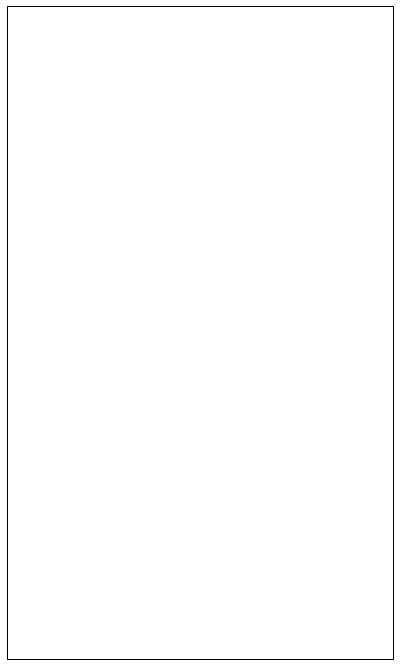

In [10]:
fig=plt.figure(figsize=(14,12))
ax=plt.subplot(1,1,1,projection=map_crs)
ax.set_extent([-90,-72,20,55])

ax.add_feature=(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature=(cfeature.LAKES.with_scale('50m'))
ax.add_feature=(cfeature.STATES.with_scale('50m'))
ax.add_feature=(cfeature.OCEAN.with_scale('50m'))
ax.add_feature=(cfeature.LAND.with_scale('50m'))

ax.add_geometries(cone_gdf['geometry'],crs=data_crs,facecolor='white',edgecolor='black',linewidth=0.25,alpha=0.4)

ax.add_geometries(track_line_gdf['geometry'],crs=data_crs,facecolor='none',edgecolor='black',linewidth=2)

ax.scatter(points_gdf['LON'],points_gdf['LAT'],transform=data_crs,zorder=10,c=points_gdf['MAXWIND'])